# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create the lists for the dataframe
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_two = []

# Set the count
first_count = 0
first_set = 1

# Print the introduction to the output
print("Beginning Data Retrieval")     
print("-----------------------------")

# Create a loop for all the cities
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        city_name.append(response["name"])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

# Create sets every 50 city
        if first_count > 49:
            first_count = 1
            first_set += 1
            city_two.append(city)
# Create city numbers
        else:
            first_count += 1
            city_two.append(city)
        print(f"Processing Record {first_count} of Set {first_set} | {city}")

# If it doesn't work, continue looping to the next city 
    except Exception:
        print("City not found. Skipping...")
        
# Print the ending of the output
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | sioux lookout
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | kaeo
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | gorokhovets
City not found. Skipping...
Processing Record 6 of Set 1 | narsaq
City not found. Skipping...
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | mataura
City not found. Skipping...
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | jamestown
City not found. Skipping...
Processing Record 14 of Set 1 | jumla
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 19 of Set 1 | menongue
Processi

Processing Record 30 of Set 4 | izhmorskiy
City not found. Skipping...
Processing Record 31 of Set 4 | fallon
Processing Record 32 of Set 4 | morondava
City not found. Skipping...
Processing Record 33 of Set 4 | inuvik
Processing Record 34 of Set 4 | bur gabo
Processing Record 35 of Set 4 | tupik
Processing Record 36 of Set 4 | port hardy
Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | wana
City not found. Skipping...
Processing Record 39 of Set 4 | valverde del camino
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | kuusamo
Processing Record 42 of Set 4 | praya
Processing Record 43 of Set 4 | bayir
Processing Record 44 of Set 4 | champoton
Processing Record 45 of Set 4 | san policarpo
Processing Record 46 of Set 4 | fortuna foothills
City not found. Skipping...
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | riyadh
Processing Record 50 of Set 4 | palmer
Processing Rec

Processing Record 15 of Set 8 | atlantic city
Processing Record 16 of Set 8 | aras
Processing Record 17 of Set 8 | bosilegrad
Processing Record 18 of Set 8 | agadez
Processing Record 19 of Set 8 | ifanadiana
Processing Record 20 of Set 8 | aksarka
Processing Record 21 of Set 8 | teguldet
Processing Record 22 of Set 8 | mgandu
City not found. Skipping...
City not found. Skipping...
Processing Record 23 of Set 8 | beloha
Processing Record 24 of Set 8 | elko
Processing Record 25 of Set 8 | odesskoye
Processing Record 26 of Set 8 | shingu
Processing Record 27 of Set 8 | richards bay
Processing Record 28 of Set 8 | anadyr
City not found. Skipping...
Processing Record 29 of Set 8 | foix
Processing Record 30 of Set 8 | reitz
Processing Record 31 of Set 8 | kidal
City not found. Skipping...
Processing Record 32 of Set 8 | rocha
City not found. Skipping...
Processing Record 33 of Set 8 | darnah
City not found. Skipping...
Processing Record 34 of Set 8 | itarema
Processing Record 35 of Set 8 | m

Processing Record 41 of Set 11 | morehead
Processing Record 42 of Set 11 | makurdi
Processing Record 43 of Set 11 | puerto carreno
Processing Record 44 of Set 11 | nurota
Processing Record 45 of Set 11 | yaan
Processing Record 46 of Set 11 | williams lake
Processing Record 47 of Set 11 | kieta
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 11 | moranbah
Processing Record 49 of Set 11 | carutapera
Processing Record 50 of Set 11 | athol
Processing Record 1 of Set 12 | marawi
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_df = pd.DataFrame(weatherpy_dict)

# Export to CSV 
weather_df.to_csv(output_data_file)

weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [31]:
pd.DataFrame(weather_df).head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sioux,1,US,1570571504,42,46.74,-90.88,69.01,5.82
1,Hithadhoo,4,MV,1570571504,72,-0.60,73.08,81.80,7.23
2,Kaeo,0,NZ,1570571504,94,-35.10,173.78,71.01,8.80
3,Tiksi,100,RU,1570571233,87,71.64,128.87,25.31,14.18
4,Gorokhovets,20,RU,1570571505,87,56.21,42.68,32.00,6.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

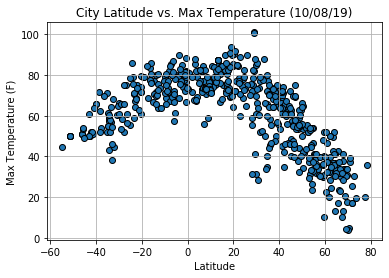

In [35]:
# Create a scatter plot for latitude vs temperature
plt.scatter(weather_dataframe["Lat"],
            weather_dataframe["Max Temp"],
            edgecolors="black", 
            facecolors="tab:blue")

# Add title, labels, grid
plt.title("City Latitude vs. Max Temperature (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid() 

# Save figure 
plt.savefig("output_data/lat_temp_plot.png")
plt.show()

#### Latitude vs. Humidity Plot

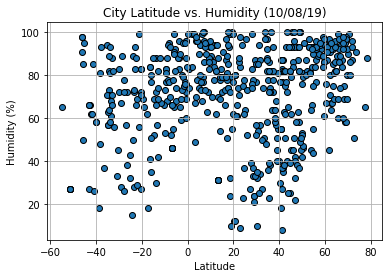

In [36]:
# Create a scatter plot for latitude vs humidity
plt.scatter(weather_dataframe["Lat"],
            weather_dataframe["Humidity"],
            edgecolors="black", 
            facecolors="tab:blue")

# Add title, labels, grid
plt.title("City Latitude vs. Humidity (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 

# Save figure 
plt.savefig("output_data/lat_humidity_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

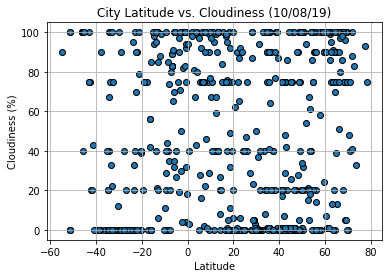

In [37]:
# Create a scatter plot for latitude vs cloudiness
plt.scatter(weather_dataframe["Lat"],
            weather_dataframe["Cloudiness"],
            edgecolors="black", 
            facecolors="tab:blue")

# Add title, labels, grid
plt.title("City Latitude vs. Cloudiness (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 

# Save figure 
plt.savefig("output_data/lat_cloud_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

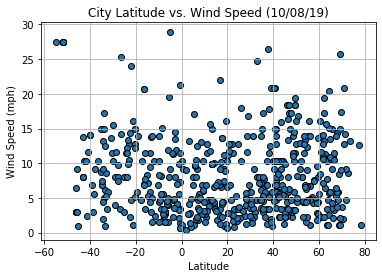

In [38]:
# Create a scatter plot for latitude vs wind speed
plt.scatter(weather_dataframe["Lat"],
            weather_dataframe["Wind Speed"],
            edgecolors="black", 
            facecolors="tab:blue")

# Add title, labels, grid
plt.title("City Latitude vs. Wind Speed (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 

# Save figure 
plt.savefig("output_data/lat_cloud_plot.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


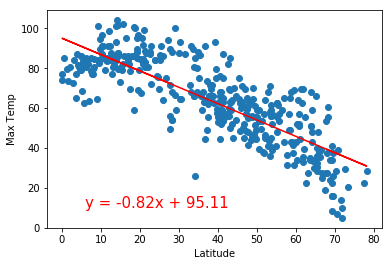

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


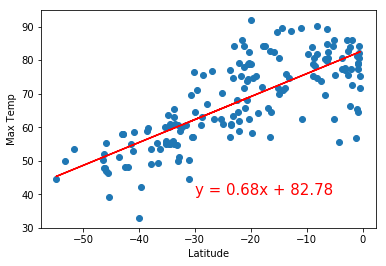

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


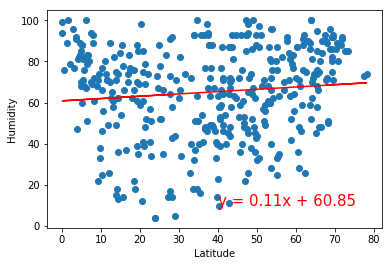

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


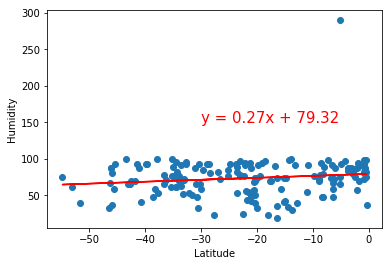

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


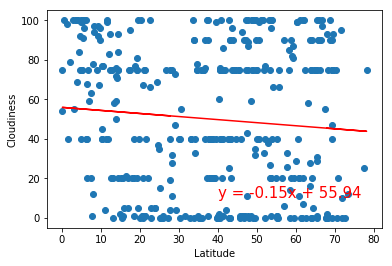

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


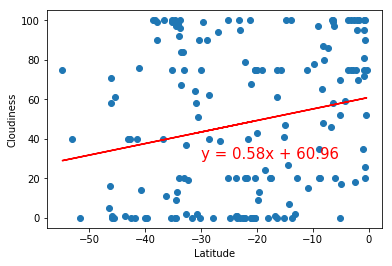

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


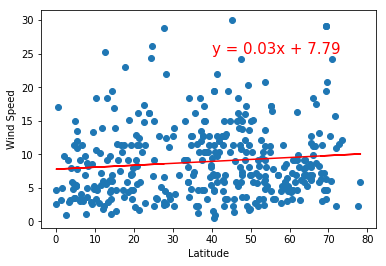

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


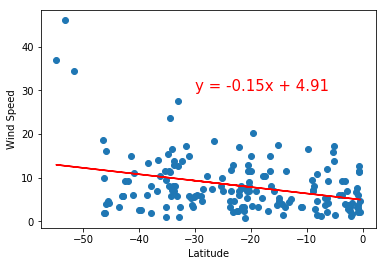